# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest Data  

In [ ]:
#df = pd.read_excel('World military power.xlsx', header=1)  #for eliminating the first header
df = pd.read_excel("World military power.xlsx")
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

# Exploratory Data Analysis (EDA)

In [ ]:
df.head(10)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [ ]:
df.shape

(139, 60)

## Convert multi index columns to one level

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df

#another solution:
#df.columns = df.columns.get_level_values(0)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [ ]:
# change the name of the first column
df.rename(columns={'Military Strength': 'Country'}, inplace=True)
df

,Country,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


In [ ]:
df.shape

(138, 60)

## Detect and drop duplicated columns

In [ ]:
# Add first column,
# Drop names of countries
# by selecting every second columns from first column onwards
df = pd.concat([df.iloc[:,0], df.iloc[:,range(1, 61, 2)]], axis=1)
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,"4,00,00,000","11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",NaN,2250.0,6043.0


In [ ]:
df.shape

(138, 31)

In [ ]:
#check duplicated rows
df.duplicated().any()

False

In [ ]:
#check columns for duplicates
df.columns.duplicated().any()

#remove duplicated rows
#https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
#df = df.loc[:,~df.columns.duplicated()]

False

## Check for missing values 

In [ ]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [ ]:
df.isnull().sum().sum()

144

## Deal with missing values 
* We can fill in missing values ​​comparing with similar countries
* Georeferences of countries may help

We will decide what to do with them according to their appearance..

In [ ]:
#Return only those rows which have missing values
null_data = df[df.isnull().any(axis=1)]
null_data

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
6,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
8,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
10,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
12,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
14,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
15,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,137.0,0.0,86.0,0.0,173.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
17,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
20,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
24,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0


Some countries do not have costline. So, it is proper to fill Total Coastline Coverage value with 0.0
(e.g. Zambia)

In [ ]:

df["Total Coastline Coverage value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 
df["Navy Fleet Strengths value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 
df["Aircraft Carrier Fleet Strength value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 
df["Submarine Fleet Strength value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 
df["Destroyer Fleet Strength value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 
df["Frigate Fleet Strength value"].replace(to_replace = np.nan, value = -0.00013, inplace=True) 

#check once more
df[df.isnull().any(axis=1)]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
7,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
10,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
58,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,238.0,500.0,99.0,155.0,4.0,20.0,40.0,0.0,"49,00,00,00,000","32,40,00,00,00,000",175.0,3841.0,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.0,1770.0,NaN
70,Madagascar,3.0869,6.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,103.0,0.0,25.0,0.0,8.0,0.0,0.0,0.0,0.0,"11,50,00,000","4,08,90,00,000",83.0,0.0,18500.0,0.0,"1,01,45,026","2,56,83,610","5,87,040",4828.0,600.0,NaN
84,New Zealand,1.3684,48.0,0.0,0.0,7.0,13.0,22.0,0.0,0.0,200.0,0.0,24.0,0.0,11.0,0.0,0.0,0.0,2.0,"4,30,00,00,000","91,62,00,00,000",123.0,31480.0,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.0,0.0,NaN
96,Philippines,0.7852,171.0,0.0,19.0,23.0,24.0,97.0,0.0,7.0,513.0,0.0,286.0,0.0,103.0,0.0,0.0,0.0,2.0,"3,47,00,00,000","76,18,00,00,000",247.0,15000.0,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.0,3219.0,NaN
106,Singapore,0.7966,235.0,100.0,0.0,9.0,36.0,77.0,17.0,180.0,3000.0,48.0,77.0,24.0,40.0,0.0,0.0,0.0,6.0,"11,20,00,00,000","5,66,10,00,00,000",9.0,0.0,"13,40,000",0.0,"40,17,314","59,95,991",697.0,193.0,10.0,NaN
114,Sri Lanka,1.4661,77.0,0.0,0.0,15.0,6.0,54.0,9.0,202.0,570.0,0.0,209.0,22.0,40.0,0.0,0.0,0.0,0.0,"2,50,00,00,000","51,72,00,00,000",19.0,0.0,90000.0,0.0,"1,09,27,071","2,25,76,592",65610.0,1340.0,160.0,NaN
120,Taiwan,0.4008,744.0,289.0,0.0,19.0,207.0,210.0,91.0,1180.0,2000.0,482.0,1160.0,115.0,117.0,0.0,4.0,4.0,22.0,"10,72,50,00,000","1,81,90,00,00,000",37.0,196.0,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.0,1566.0,3720.0,NaN


In [ ]:
#those border values should be same as coast border
#because they are islands. Therefore:
#                      Total Coastline Coverage value >> Total Border Coverage value

#df['col1'] = np.where(df['col1'] == 0, df['col2'], df['col1'])   #ref https://stackoverflow.com/questions/39903090/efficiently-replace-values-from-a-column-to-another-column-pandas-dataframe
df['Total Border Coverage value'] = np.where(df['Total Border Coverage value'].isnull(), df['Total Coastline Coverage value'], df['Total Border Coverage value'])
df

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
5,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0,5267.0
135,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0,4616.0
136,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,"1,40,00,00,000","7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0,1601.0
137,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,"4,00,00,000","11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",-0.00013,2250.0,6043.0


In [ ]:
df[df.isnull().any(axis=1)].count()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

No missing values so far. Done.

## Fix the dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    object 
 2   Aircraft Strength value                  138 non-null    object 
 3   Fighter/Interceptor Strength value       138 non-null    object 
 4   Attack Aircraft Strength value           138 non-null    object 
 5   Transport Aircraft Fleet Strength value  138 non-null    object 
 6   Trainer Aircraft Fleet value             138 non-null    object 
 7   Helicopter Fleet Strength value          138 non-null    object 
 8   Attack Helicopter Fleet Strength value   138 non-null    object 
 9   Tank Strength value                      138 non-null    object 
 10  AFV/APC Strength value                   138 non-n

In [ ]:
#remove commas from numbers
df.replace(',','', regex=True, inplace=True)

We will convert object values to numbers.

In [ ]:
df_ = df.drop(["Country"], axis=1)
df_ = df_.astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

Ready to apply to our dataset.

In [ ]:
df = pd.concat([df['Country'], df_], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [ ]:
df.set_index("Country")

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.00000,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.00000,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.00000,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.00000,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.00000,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.00000,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5.500000e+09,9.658000e+10,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.00000,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.00000,0.0,1601.0


## Drop the features that do not affect military power
* Some features are irrelevant to georeferences

We can see that fields: 'defense spending budget value' and 'External Debt value' does not effect/define military power. We drop them.

In [ ]:
df = df.drop(["defense spending budget value", "External Debt value"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Visualy inspect some of the features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,0.06060,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.00000,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.00000,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.00000,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.00000,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.00000,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.00000,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.00000,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.00000,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.00000,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


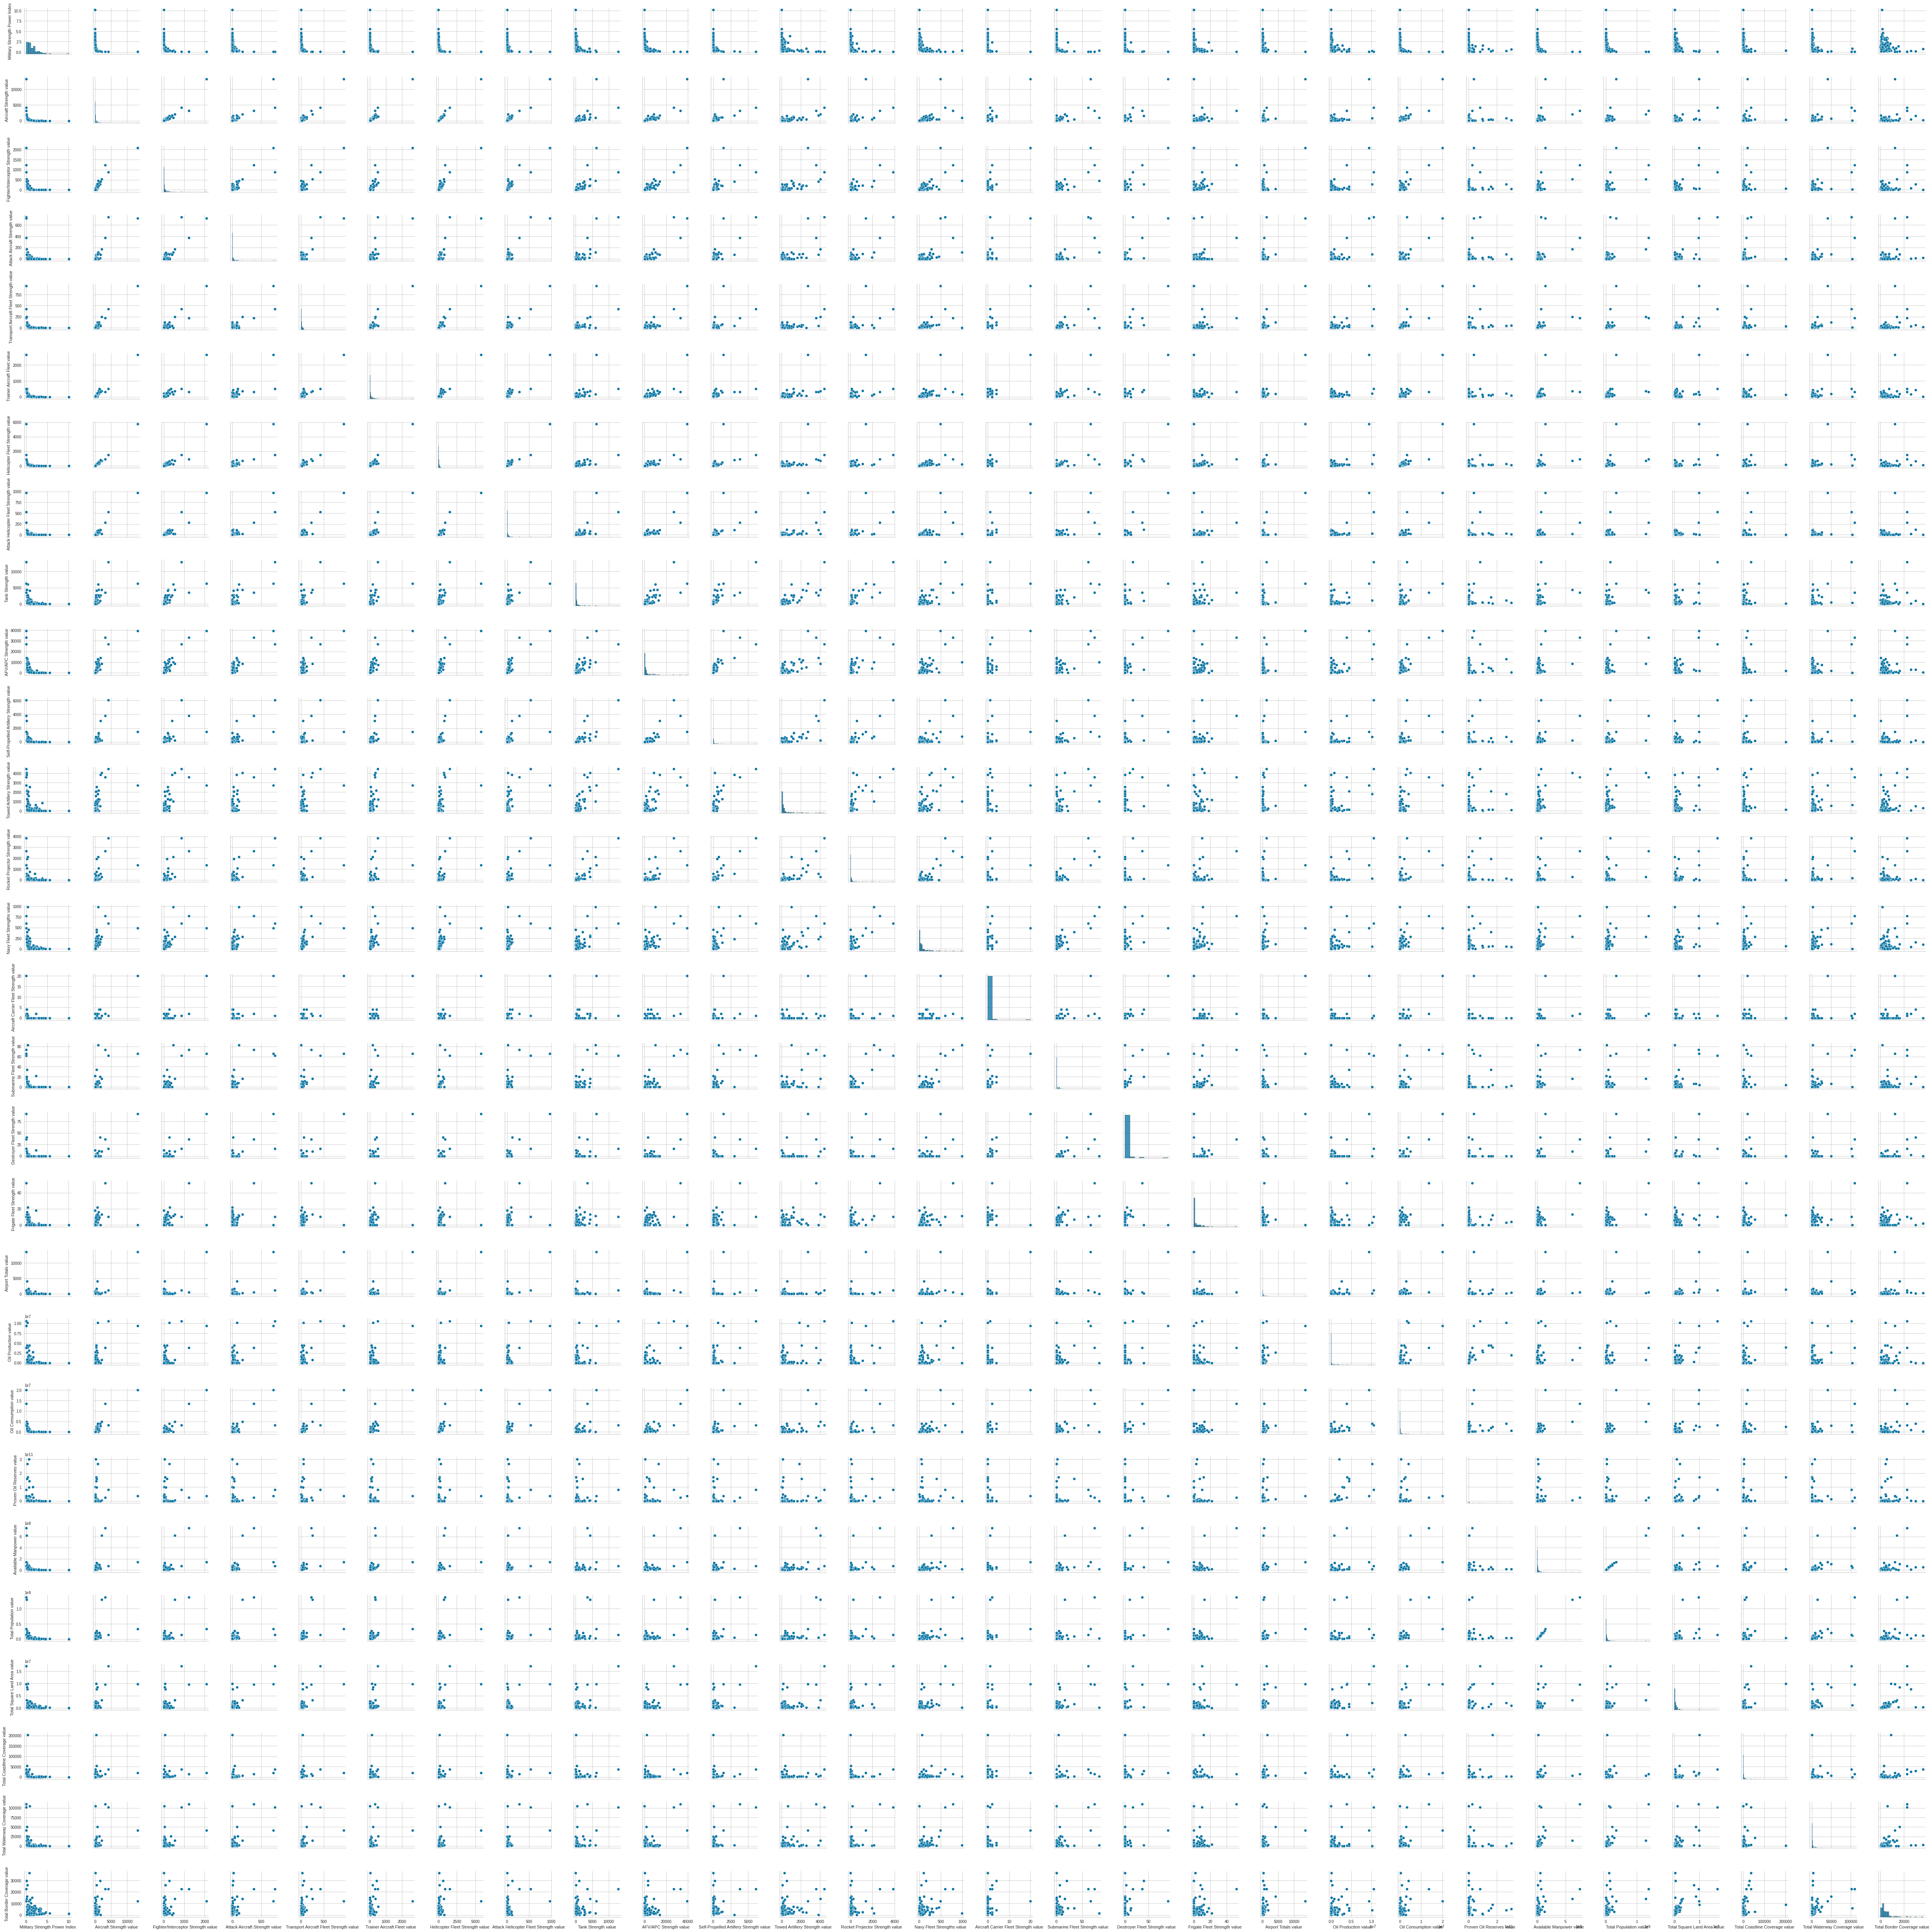

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
df.columns

Index(['Country', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'Airport Totals value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value',
       'Total Border

In [ ]:
#boxplots:  https://www.simplypsychology.org/boxplots.html
#code:      https://stackoverflow.com/questions/62330801/how-to-get-min-and-max-values-from-boxplot-in-python
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [l,u]

In [ ]:
def rem_outliers(data, feature):
  down,up = iqr_fence(data[feature])
  return data[(data[feature]>=down) & (data[feature]<=up)]

In [ ]:
df_ = df.drop(["Country"], axis=1)
for column in df_:
    print(column)
    df_ = rem_outliers(df_, column)
    print(df_.shape)

# we see that it removes many countries. We will not use this method and not remove the outliers this way.

Military Strength Power Index
(133, 28)
Aircraft Strength value
(116, 28)
Fighter/Interceptor Strength value
(111, 28)
Attack Aircraft Strength value
(101, 28)
Transport Aircraft Fleet Strength value
(90, 28)
Trainer Aircraft Fleet value
(87, 28)
Helicopter Fleet Strength value
(84, 28)
Attack Helicopter Fleet Strength value
(74, 28)
Tank Strength value
(69, 28)
AFV/APC Strength value
(65, 28)
Self-Propelled Artillery Strength value
(59, 28)
Towed Artillery Strength value
(55, 28)
Rocket Projector Strength value
(50, 28)
Navy Fleet Strengths value
(46, 28)
Aircraft Carrier Fleet Strength value
(45, 28)
Submarine Fleet Strength value
(43, 28)
Destroyer Fleet Strength value
(43, 28)
Frigate Fleet Strength value
(39, 28)
Airport Totals value
(35, 28)
Oil Production value
(28, 28)
Oil Consumption value
(25, 28)
Proven Oil Reserves value


ValueError: ignored

In [ ]:
df.shape

(138, 29)

In [ ]:
df = df.drop(["Aircraft Carrier Fleet Strength value", "Destroyer Fleet Strength value"], axis=1)

In [ ]:
df.shape

(138, 27)

## Decriptive statistics

In [ ]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Submarine Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362306,3.999978,2.934761,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,4874.456494,5464.130435,4539.181159
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821992,12.631794,6.057167,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,18603.336317,16494.534600,5481.108084
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000130,-0.000130,-0.000130,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,-0.000130,0.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,49.750000,0.000000,1571.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,793.000000,875.000000,2830.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,2.000000,4.000000,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,2746.500000,3050.000000,5345.250000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,83.000000,52.000000,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,36289.000000


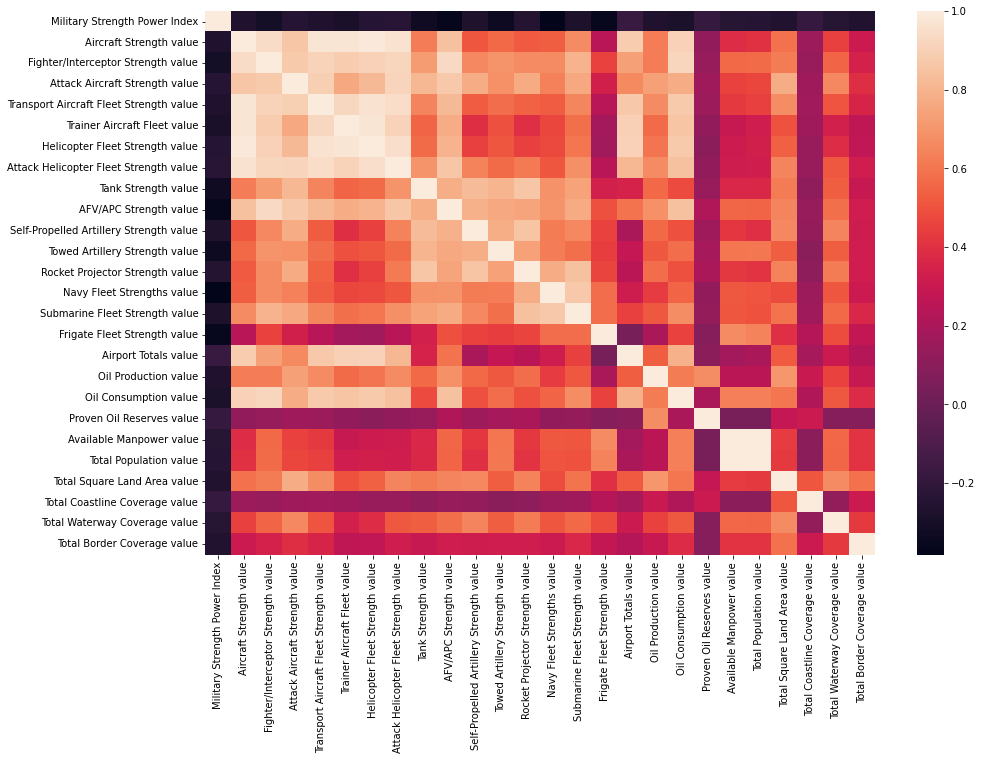

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(df.corr()) #, annot = True)

In [ ]:
df.columns

Index(['Country', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Submarine Fleet Strength value',
       'Frigate Fleet Strength value', 'Airport Totals value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value',
       'Total Border Coverage value'],
      dtype='object')

# Data Preprocessing

## Scaling

We will need scaling to normalize the ranges between features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Country',axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.317813,-0.486276,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.110873,-0.136390,-0.262975,-0.259460,0.265109
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273409,-0.317813,-0.486276,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.304683,-0.417556,-0.243445,-0.329981,-0.704639
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,0.158909,0.342200,-0.110084,0.433720,-0.174470,0.006007,-0.055840,-0.070045,0.643550,-0.209133,-0.332476,0.401892
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.317813,-0.486276,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,-0.138744,0.131692,-0.176656,-0.253375,0.151948
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.158906,-0.486276,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,-0.051586,0.823329,0.006180,0.336841,1.360287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-0.618411,-0.104660,-0.189836,-0.273513,0.236622,-0.003473,-0.131325,-0.161109,-0.169915,-0.349792,-0.202995,-0.361183,-0.250578,-0.195012,-0.158906,0.176505,0.127388,0.855733,-0.058779,6.783682,-0.132812,-0.130639,-0.019222,-0.111916,0.099538,0.133271
134,-0.837482,-0.077776,-0.019893,-0.273513,0.084440,-0.195196,-0.030996,-0.006426,1.303631,0.008218,-0.207371,0.754832,-0.149050,-0.080980,0.158909,1.004980,-0.202756,-0.189125,-0.081918,-0.177110,0.304040,0.266609,-0.281158,-0.077173,0.744638,0.014066
135,-0.166399,-0.178794,-0.019893,-0.273513,-0.241663,-0.257714,-0.179560,-0.119860,-0.017593,-0.347009,-0.280307,-0.384848,-0.014369,-0.330426,-0.317813,-0.486276,-0.192827,-0.345131,-0.257767,-0.209977,-0.168369,-0.149009,-0.192428,-0.160147,-0.332476,-0.538009
136,0.140754,-0.228488,-0.276986,-0.273513,-0.209053,-0.128510,-0.245160,-0.264231,-0.378529,-0.426959,-0.309482,-0.438407,-0.221570,-0.544237,-0.317813,-0.486276,-0.167176,-0.352511,-0.315150,-0.280406,-0.228931,-0.223303,-0.091119,-0.262975,-0.195570,0.275364


# Modelling

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K_means_model = KMeans(n_clusters=10, random_state=42)
K_means_model.fit_predict(X_scaled)

array([1, 1, 4, 1, 9, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1,
       8, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 9, 1, 4, 1, 1, 4,
       1, 4, 1, 1, 1, 2, 4, 0, 0, 1, 4, 4, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 4, 1, 1, 1, 9, 1, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 3, 1,
       1, 0, 4, 1, 1, 1], dtype=int32)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [ ]:
# !pip install pyclustertend

In [ ]:
# Clustering Tendency Test >> Hopkins Test
from pyclustertend import hopkins

In [ ]:
hopkins(X_scaled, X_scaled.shape[0])

0.08874709465564287

In [ ]:
hopkins(X_scaled, 60)

0.08043126423289333

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [ ]:
ssd = []

K = range(2,10) # must be minimum 2

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_) # inertia: kucukse data bir noktaya yogunlasmis; buyukse data, merkez etrafinda genis bir alana yayilim yapmis.
    # inertia degerinin kucuklugu (merkez etrafinda yogunlasmasi) benim kumeleme islemimin kolay olacagi anlamina gelir.

Text(0.5, 1.0, 'elbow method')

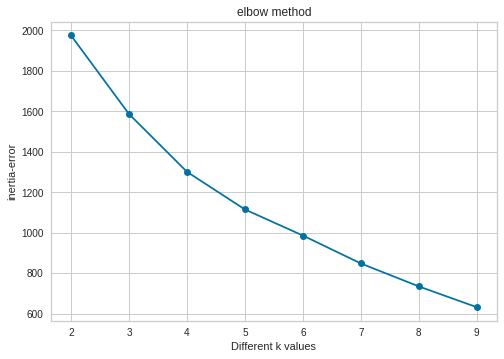

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [ ]:
ssd

[1975.3452117255913,
 1586.7074221497055,
 1300.9743734286717,
 1114.626340415866,
 985.5921719303756,
 847.5949075524691,
 734.0173408086794,
 631.1907896946464]

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,388.637790
3,285.733049
4,186.348033
5,129.034168
6,137.997264
7,113.577567
8,102.826551


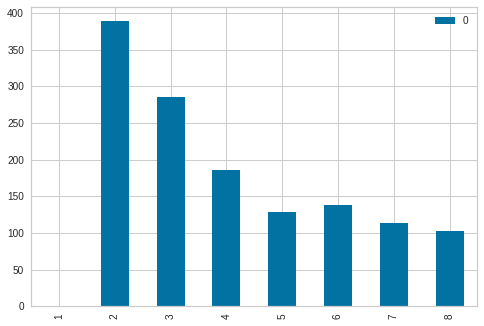

In [ ]:
df_diff.plot(kind='bar')

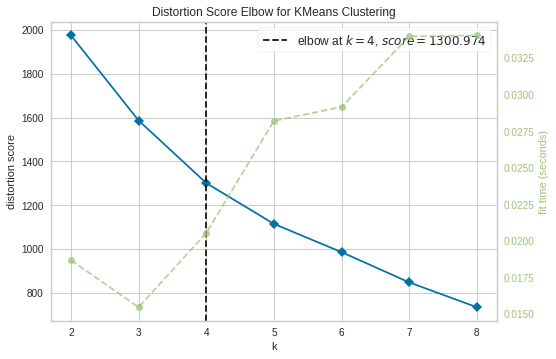

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

#### Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_scaled, K_means_model.labels_) 

0.4166052665748438

In [ ]:
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8488111601946081
For n_clusters=3, the silhouette score is 0.8328030996634052
For n_clusters=4, the silhouette score is 0.47178610357341505
For n_clusters=5, the silhouette score is 0.44980185892931546
For n_clusters=6, the silhouette score is 0.4547769379829234
For n_clusters=7, the silhouette score is 0.43294985739621394
For n_clusters=8, the silhouette score is 0.44306072681383035
For n_clusters=9, the silhouette score is 0.4207827272495489
For n_clusters=10, the silhouette score is 0.4166052665748438
For n_clusters=11, the silhouette score is 0.2967392952744722
For n_clusters=12, the silhouette score is 0.23875125601225866
For n_clusters=13, the silhouette score is 0.1859114611132322
For n_clusters=14, the silhouette score is 0.25236438484034046


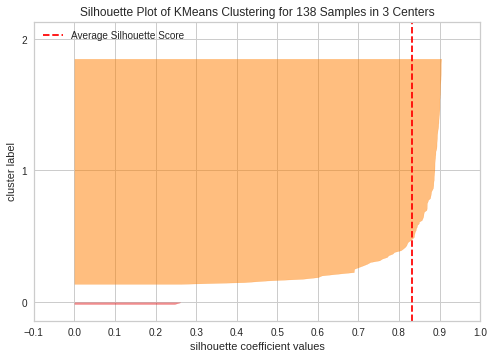

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)   
visualizer.poof();

We tend to choose K=3 

### Model Building and label visualisation

In [ ]:
Kmodel = KMeans(n_clusters =3, random_state=42)
Kmodel.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

### Evaluate 

In [ ]:
df.columns

Index(['Country', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Submarine Fleet Strength value',
       'Frigate Fleet Strength value', 'Airport Totals value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value',
       'Total Border Coverage value'],
      dtype='object')

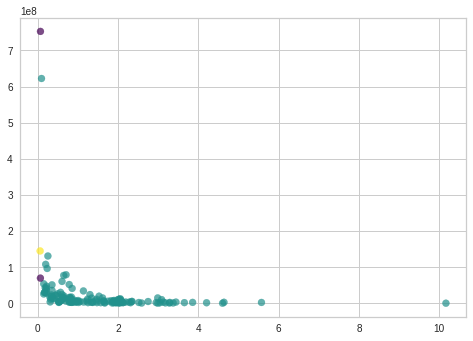

In [ ]:
plt.scatter(df["Military Strength Power Index"], df["Available Manpower value"], c = Kmodel.labels_, cmap = "viridis", alpha=0.7)

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

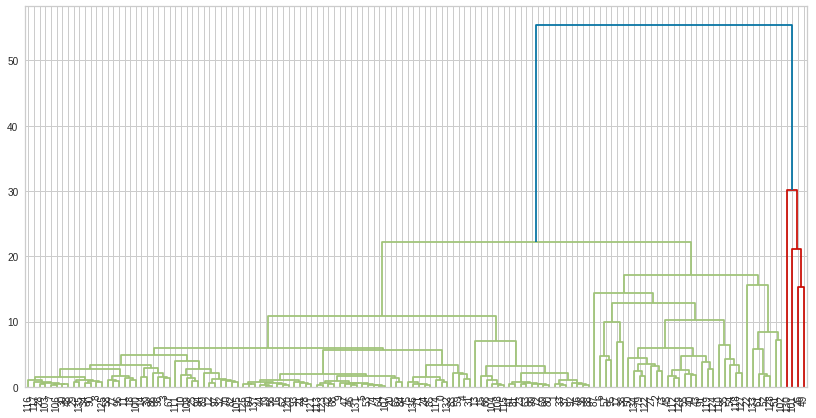

In [ ]:
hc_ward = linkage(y = X_scaled, method = "ward")
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10); 

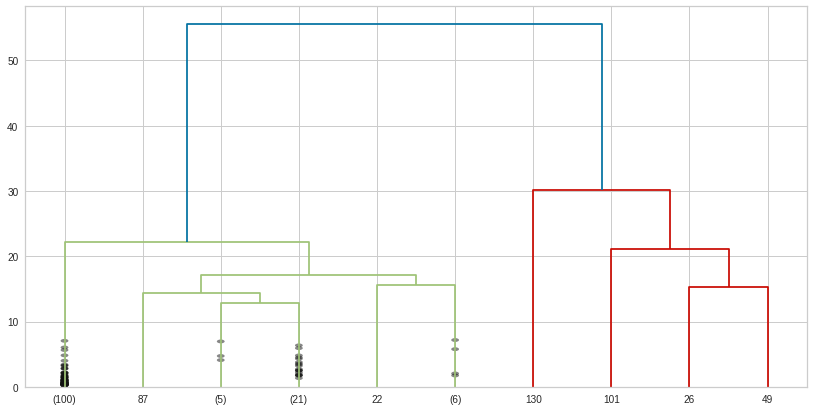

In [ ]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

Clusters = 3

### Model Building and label visualisation

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X_scaled)
X['cluster'] = clusters
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
X.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Submarine Fleet Strength value',
       'Frigate Fleet Strength value', 'Airport Totals value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value',
       'Total Border Coverage value', 'cluster'],
      dtype='object')

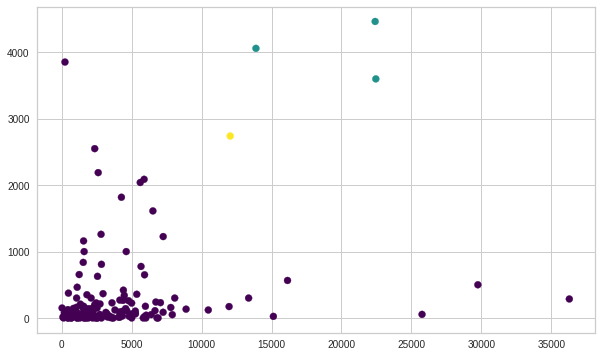

In [ ]:
plt.scatter(X["Total Border Coverage value"], X["Towed Artillery Strength value"], c = clusters, cmap = "viridis")

### Evaluate 

In [ ]:
X_ = pd.DataFrame(X_scaled, columns=X.columns[0:-1]) #we had additional column 'cluster' at the last position
X_['cluster'] = X['cluster']

In [ ]:
clus_pred = X_.groupby("cluster").mean().T
clus_pred

cluster,0.0,1.0,2.0
Military Strength Power Index,0.016563,-0.813578,0.326092
Aircraft Strength value,-0.001088,0.175039,-0.275738
Fighter/Interceptor Strength value,0.002484,0.126810,-0.355421
Attack Aircraft Strength value,-0.004885,0.285669,-0.199191
Transport Aircraft Fleet Strength value,-0.005463,0.319960,-0.230793
Trainer Aircraft Fleet value,0.000037,0.206310,-0.278554
Helicopter Fleet Strength value,-0.001649,0.142650,-0.272171
Attack Helicopter Fleet Strength value,0.006057,-0.092361,-0.264231
Tank Strength value,0.008863,-0.124660,-0.376543
AFV/APC Strength value,-0.005153,0.441541,-0.375205


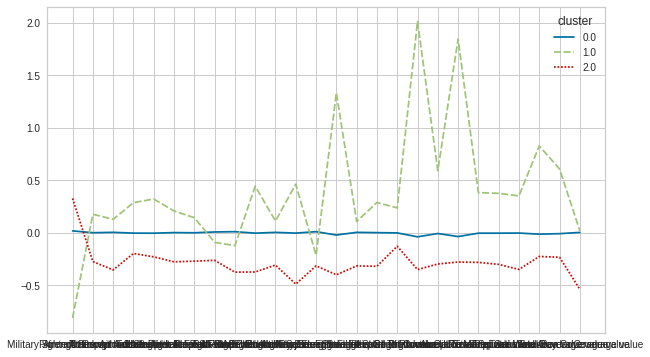

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
sns.lineplot(data = clus_pred)

It is not possible to distinguish feature names from the figure above. We should define the separation by feature names. To list them we need to define a separation value.

In [ ]:
clus_pred = X_.groupby("cluster").mean().T
clus_pred['diff_01'] = np.abs(clus_pred[0.0] - clus_pred[1.0])
clus_pred['diff_02'] = np.abs(clus_pred[0.0] - clus_pred[2.0])
clus_pred['total_diff'] = clus_pred['diff_01'] + clus_pred['diff_02']
clus_pred
clus_pred.sort_values(['total_diff'], ascending=False)

cluster,0.0,1.0,2.0,diff_01,diff_02,total_diff
Oil Production value,-0.040093,2.012465,-0.352511,2.052558,0.312418,2.364977
Proven Oil Reserves value,-0.037423,1.846035,-0.280406,1.883459,0.242983,2.126442
Navy Fleet Strengths value,-0.022945,1.332549,-0.401696,1.355494,0.378751,1.734245
Military Strength Power Index,0.016563,-0.813578,0.326092,0.830141,0.309529,1.139670
Total Coastline Coverage value,-0.014948,0.826160,-0.227368,0.841108,0.212420,1.053528
Towed Artillery Strength value,-0.004684,0.461712,-0.490720,0.466395,0.486037,0.952432
Oil Consumption value,-0.008632,0.589859,-0.299138,0.598491,0.290506,0.888997
Total Waterway Coverage value,-0.009966,0.606677,-0.235121,0.616643,0.225155,0.841798
AFV/APC Strength value,-0.005153,0.441541,-0.375205,0.446693,0.370052,0.816746
Total Square Land Area value,-0.004232,0.350117,-0.351054,0.354349,0.346822,0.701171


We will take only those which discriminates the clusters best and construct our model on them.

* Oil Production value	
* Proven Oil Reserves value	
* Navy Fleet Strengths value	
* Military Strength Power Index	
* Total Coastline Coverage value
* Towed Artillery Strength value
* Oil Consumption value	
* Total Waterway Coverage value	
* AFV/APC Strength value	
* Total Square Land Area value	
* Total Population value	
* Available Manpower value

In [ ]:
X_disc = X_[['Oil Production value', 
             'Proven Oil Reserves value', 
             'Navy Fleet Strengths value', 
             'Military Strength Power Index', 
             'Total Coastline Coverage value',
             'Towed Artillery Strength value',
             'Oil Consumption value',
             'Total Waterway Coverage value',
             'AFV/APC Strength value',
             'Total Square Land Area value',
             'Total Population value',
             'Available Manpower value']]
X_disc

,Oil Production value,Proven Oil Reserves value,Navy Fleet Strengths value,Military Strength Power Index,Total Coastline Coverage value,Towed Artillery Strength value,Oil Consumption value,Total Waterway Coverage value,AFV/APC Strength value,Total Square Land Area value,Total Population value,Available Manpower value
0,-0.352511,-0.280406,-0.544237,-0.088171,-0.262975,-0.271503,-0.322322,-0.259460,-0.264092,-0.136390,-0.110873,-0.132033
1,-0.342879,-0.276455,-0.273409,0.646586,-0.243445,-0.490720,-0.305200,-0.329981,-0.374463,-0.417556,-0.304683,-0.284127
2,0.433720,0.006007,0.888297,-0.754099,-0.209133,-0.191788,-0.174470,-0.332476,0.904357,0.643550,-0.070045,-0.055840
3,0.650446,-0.086185,-0.137996,-0.472112,-0.176656,-0.046058,-0.286782,-0.253375,-0.350719,0.131692,-0.138744,-0.228013
4,-0.063905,-0.229110,-0.195012,-0.612954,0.006180,-0.276485,-0.007876,0.336841,-0.324008,0.823329,-0.051586,-0.062512
...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.855733,6.783682,-0.195012,-0.618411,-0.111916,-0.361183,-0.058779,0.099538,-0.349792,-0.019222,-0.130639,-0.132812
134,-0.189125,-0.177110,-0.080980,-0.837482,-0.077173,0.754832,-0.081918,0.744638,0.008218,-0.281158,0.266609,0.304040
135,-0.345131,-0.209977,-0.330426,-0.166399,-0.160147,-0.384848,-0.257767,-0.332476,-0.347009,-0.192428,-0.149009,-0.168369
136,-0.352511,-0.280406,-0.544237,0.140754,-0.262975,-0.438407,-0.315150,-0.195570,-0.426959,-0.091119,-0.223303,-0.228931


In [ ]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X_disc)
X_disc["cluster"] = clusters

In [ ]:
X_disc.cluster.value_counts()

2    127
1      7
0      4
Name: cluster, dtype: int64

In [ ]:
def viz_outliers(data, ref_col, cols_num=3):
  index = 0
  cols=cols_num
  rows=len(data.columns)/cols
  plt.figure(figsize=(5*cols,5*rows))
  for feature in data.columns:
     if feature != ref_col:
        index += 1
        plt.subplot(rows,cols,index)
        sns.boxplot(x= ref_col,y=feature,data=data)

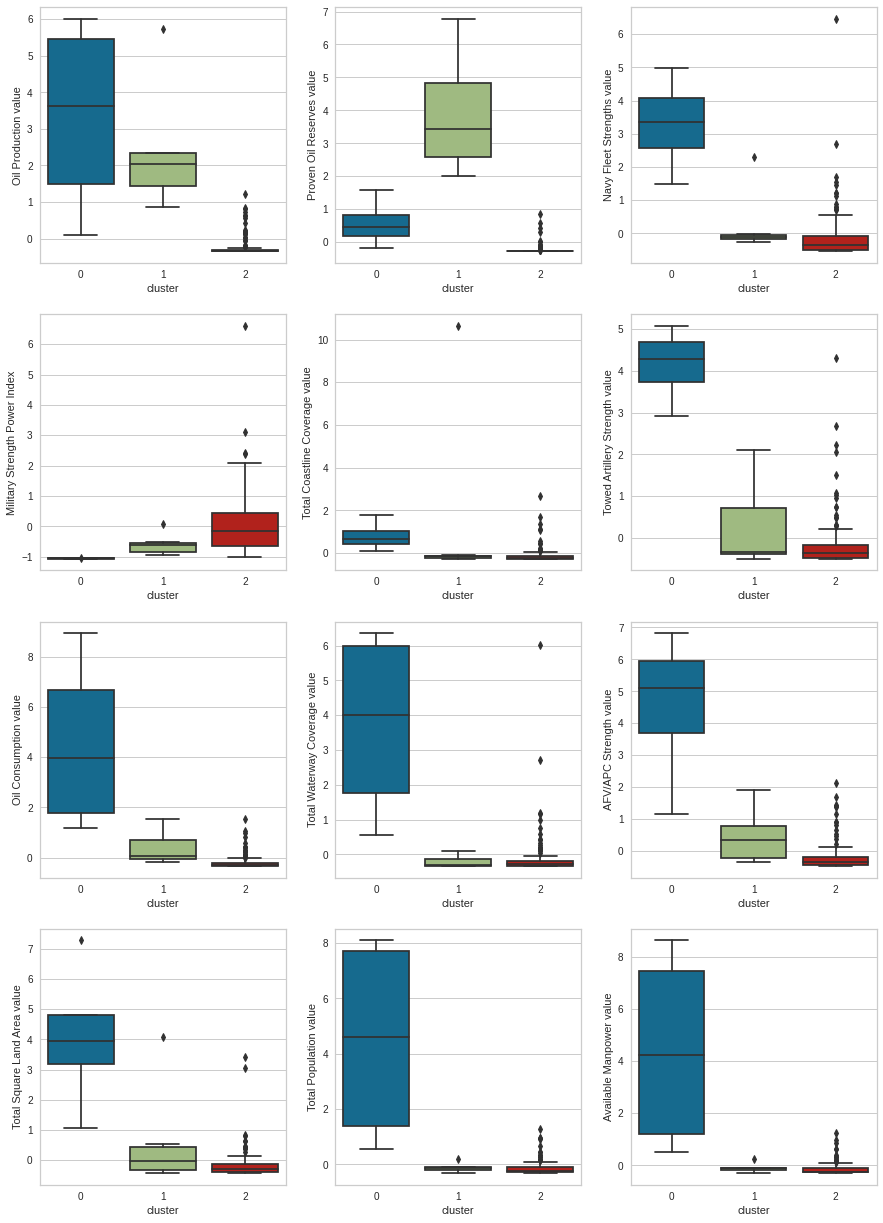

In [ ]:
viz_outliers(X_disc, "cluster")

The most disciminative features are:
* Proven Oil Reserves value
* Oil Consumption value

In [ ]:
X_disc["power_level"] = X_disc["cluster"].map({0:"high", 1:"mid",2:"low"})
X_disc.head()

,Oil Production value,Proven Oil Reserves value,Navy Fleet Strengths value,Military Strength Power Index,Total Coastline Coverage value,Towed Artillery Strength value,Oil Consumption value,Total Waterway Coverage value,AFV/APC Strength value,Total Square Land Area value,Total Population value,Available Manpower value,cluster,power_level
0,-0.352511,-0.280406,-0.544237,-0.088171,-0.262975,-0.271503,-0.322322,-0.259460,-0.264092,-0.136390,-0.110873,-0.132033,2,low
1,-0.342879,-0.276455,-0.273409,0.646586,-0.243445,-0.490720,-0.305200,-0.329981,-0.374463,-0.417556,-0.304683,-0.284127,2,low
2,0.433720,0.006007,0.888297,-0.754099,-0.209133,-0.191788,-0.174470,-0.332476,0.904357,0.643550,-0.070045,-0.055840,2,low
3,0.650446,-0.086185,-0.137996,-0.472112,-0.176656,-0.046058,-0.286782,-0.253375,-0.350719,0.131692,-0.138744,-0.228013,2,low
4,-0.063905,-0.229110,-0.195012,-0.612954,0.006180,-0.276485,-0.007876,0.336841,-0.324008,0.823329,-0.051586,-0.062512,2,low


In [ ]:
X_disc["Country"] = df["Country"]

In [ ]:
X_disc[X_disc.power_level=="low"]["Country"]

0              NaN
1      Afghanistan
2          Albania
3          Algeria
4           Angola
          ...     
132        Uruguay
134      Venezuela
135        Vietnam
136          Yemen
137         Zambia
Name: Country, Length: 127, dtype: object

In [ ]:
X_disc[X_disc.power_level=="low"]["Country"].count()

126

In [ ]:
X_disc[X_disc.power_level=="high"]["Country"]

26              Chile
49            Hungary
101           Romania
130    United Kingdom
Name: Country, dtype: object

In [ ]:
X_disc[X_disc.power_level=="high"]["Country"].count()

4

In [ ]:
X_disc[X_disc.power_level=="mid"]["Country"]

22       Cameroon
51      Indonesia
52           Iran
61          Kenya
102        Russia
128       Ukraine
133    Uzbekistan
Name: Country, dtype: object

In [ ]:
X_disc[X_disc.power_level=="mid"]["Country"].count()

7